# Welcome back to to python data mining course! 
# In this tutorial we will talk about basics of data mining

## Cluster analysis
## Classification and regression
### Logistic regression, k-nn classifier, and svm
## Association and correlation
### Outlier
## Dimensionality reduction


## Section 2.1 Cluster analysis

In [ ]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans 
%matplotlib  inline 

In [ ]:
df = pd.read_csv('../../single_family_home_values.csv') # zillow 

In [ ]:
df.head(2)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
X = df.drop('estimated_value', axis=1) 

In [ ]:
X= X[['bedrooms', 'bathrooms',  'rooms', 'squareFootage','lotSize', 'yearBuilt', 'priorSaleAmount']]

In [ ]:
X.fillna(0, inplace=True)

In [ ]:
X.head(2)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [ ]:
labels= kmeans.labels_

In [ ]:
labels

In [ ]:
kmeans.cluster_centers_


In [ ]:
X['cluster'] = labels

In [ ]:
X.head()

In [ ]:
X.groupby('cluster').mean()

In [ ]:
X.groupby('cluster').median()

In [ ]:
X= X.drop('cluster', axis=1)

In [ ]:
from  sklearn.metrics import silhouette_score

In [ ]:
for i in range(3, 10):
    kmeans=KMeans(n_clusters=i).fit(X)
    labels = kmeans.labels_
    print(silhouette_score(X,  labels))
    #print  kmeans.cluster_centers_  

In [ ]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
Xi = iris.data
yi = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(Xi)
    labels = est.labels_

    ax.scatter(Xi[:, 3], Xi[:, 0], Xi[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(Xi[yi == label, 3].mean(),
              Xi[yi == label, 0].mean(),
              Xi[yi == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
yi = np.choose(yi, [1, 2, 0]).astype(np.float)
ax.scatter(Xi[:, 3], Xi[:, 0], Xi[:, 2], c=yi, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()


## Section 2.2 Classification and regression

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression 

from sklearn.svm import SVC, SVR

from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
X.head(2)

In [ ]:
df.info()

In [ ]:
y=df.estimated_value 

In [ ]:
lg = LinearRegression()
lg.fit(X,y) #training 
lg.score(X,y) 

In [ ]:
X_train, X_test,  y_train, y_test= train_test_split(X,y)

In [ ]:
X_train.shape, y_train.shape 

In [ ]:
lg = LinearRegression()
lg.fit(X_train,y_train) # training , fit 
lg.score(X_test,y_test) # evaluate , score, R2 

In [ ]:
df['estimated_value_bins']=df.estimated_value.apply(lambda x: 'high' if x> 500000 else 'low')

In [ ]:
df.estimated_value_bins.value_counts()

In [ ]:
y2= df.estimated_value_bins

In [ ]:
log = LogisticRegression() 

In [ ]:
X_train, X_test,  y2_train, y2_test= train_test_split(X,y2)

In [ ]:
log.fit(X_train, y2_train)

In [ ]:
log.score(X_test, y2_test)

In [ ]:
y_pred = log.predict(X_test) 

In [ ]:
np.array(y2_test)

In [ ]:
confusion_matrix(y2_test,y_pred )

In [ ]:
## Section 2.2 Continued
from IPython.display import Image

In [ ]:
Image('../../svm.png')
#print('Support Vector Machine')

In [ ]:
svr= SVR() 
svr.fit(X_train, y_train)
svr.score(X_test, y_test) 
# not so great 

In [ ]:
svc= SVC() 
svc.fit(X_train, y2_train)
svc.score(X_test, y2_test) 

In [ ]:
y2_pred=svc.predict(X_test)

In [ ]:
confusion_matrix(y2_test, y2_pred)

In [ ]:
## KNN: 
# xxxxxx
# unknown=x
# xxxxx    

#      ooooooo
#         unknown= o 
#     ooooooo

In [ ]:
knn= KNeighborsRegressor() 

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
knn.score(X_test, y_test)

In [ ]:
knn= KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y2_train)

In [ ]:
knn.score(X_test,y2_test) 

In [ ]:
y2_pred=knn.predict(X_test)

In [ ]:
confusion_matrix(y2_test, y2_pred)

## Section 2.3 Association and correlation

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.cov()

In [ ]:
y=df.estimated_value

In [ ]:
X.columns

In [ ]:
for i in X.columns:
    print  ('====')
    print i
    X.loc[:, i].hist()
    print 'mean:' ,  X.loc[:, i].mean()
    print 'std:' ,  X.loc[:, i].std()
    plt.show()

In [ ]:
X2=X[(X.bedrooms<7) & (X.bathrooms< 7)   ] #drop  

In [ ]:
X2.bathrooms.hist()

In [ ]:
# Outliers 

# 1. Three Sigma Rule:   
# 2. Boxplot Rule:
    

In [ ]:
sns.boxplot(X[['bedrooms', 'bathrooms', 'rooms']])

In [ ]:
sns.boxplot(X[['lotSize']])

In [ ]:
#Mahalanobis Rule  

In [ ]:
def MahalanobisDist(x, y):
    covariance_xy = np.cov(x,y, rowvar=0)
    inv_covariance_xy = np.linalg.inv(covariance_xy)
    xy_mean = np.mean(x),np.mean(y)
    x_diff = np.array([x_i - xy_mean[0] for x_i in x])
    y_diff = np.array([y_i - xy_mean[1] for y_i in y])
    diff_xy = np.transpose([x_diff, y_diff])
    
    md = []
    for i in range(len(diff_xy)):
        md.append(np.sqrt(np.dot(np.dot(np.transpose(diff_xy[i]),inv_covariance_xy),diff_xy[i])))
    return md

In [ ]:
# as column vectors
xm = np.random.poisson(5,10)
ym = np.random.poisson(5,10)
MahalanobisDist(xm,ym)

## Section 2.4 Dimensionality reduction

Curse of dimensionality: "As the number of features or dimensions grows, the amount of data we need to generalize accurately grows exponentially" 

In [65]:
from sklearn.decomposition import PCA 

In [66]:
pca = PCA(4) 

In [67]:
X.shape 

(15000, 7)

In [68]:
X_transformed = pca.fit_transform(X)

In [69]:
X_transformed.shape

(15000, 4)

In [70]:
pca.components_[0] 

array([4.34835866e-07, 1.39033126e-06, 1.76645671e-06, 9.91884229e-04,
       1.22556479e-03, 8.13159056e-06, 9.99998757e-01])

In [71]:
lg=LinearRegression()

In [72]:
X_train, X_test, y_train, y_test= train_test_split(X_transformed, y)

ValueError: Found input variables with inconsistent numbers of samples: [15000, 10]

In [176]:
lg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [177]:
lg.score(X_test, y_test) 

0.70664730600167636

## Seciton 2.5 Dimensionality reduction Continued : PCA

## What is Principal Components Analysis (PCA)?

PCA is a complexity-reduction technique that tries to reduce a set of variables down to a smaller set of components that represent most of the information in the variables.  At a conceptual level, PCA works by identifying sets of variables that share variance, and creating a component to represent that variance.  For example, the two images below represent the two different ways of sharing variance across three variables.  In each, overlapping areas represent shared variance.  

![PCA example](pca_pic.png)

A PCA of set A would probably result in one component representing the variance shared by all three, discarding the rest of the information in the circles.  A PCA of set B, on the other hand, would probably result in two components, one representing the overlapping area shared by magenta and cyan, and one representing the variance in yellow not already included in the magenta/cyan component.  In both cases, some variance is lost.

## Why PCA?
Losing variance in exchange for a smaller set of features can be worthwhile. Some model types (such as regression) assume that features will be uncorrelated with each other, and high levels of inter-feature correlation create unstable solutions. Solutions with fewer features are easier to understand and are more computationally efficient. Solutions with fewer features are also less vulnerable to overfitting.

Curse of dimensionality: 
Working with data becomes more demanding as the number of dimensions increases. 
![CurseofDimensionality](curse_of_dimensionality.png)

With n = 1, there are only 5 boxes to search. With n = 2, there are now 25 boxes; and with n = 3, there are 125 boxes to search. As n gets bigger, it becomes difficult to sample all the boxes. This makes the treasure harder to find — especially as many of the boxes are likely to be empty!
In general, with n dimensions each allowing for m states, we will have m^n possible combinations. Try plugging in a few different values and you will be convinced that this presents a workload-versus-sampling challenge to machines tasked with repeatedly sampling different combinations of variables.
With high-dimensional data, we simply cannot comprehensively sample all the possible combinations, leaving vast regions of feature space in the dark.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH   5.0     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   
1    CH  25.0     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   

   gndr  agea  partner  
0   2.0  60.0      1.0  
1   2.0  59.0      1.0  


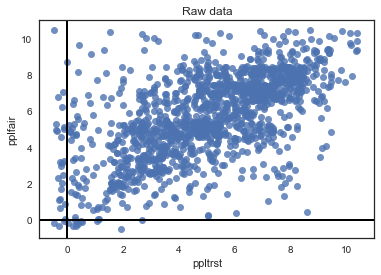

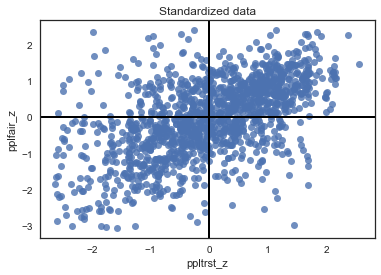

In [12]:
# Make the scatterplot matrix.

# Setting the default plot aesthetics to be prettier.
sns.set_style("white")

df = pd.read_csv('ESSdata.csv')

print df.head(2)

# Take a subset of the data for PCA. This limits to Swiss and Czech data from 2012
# and keeps only specific columns.
df_pca = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['tvtot','ppltrst','pplfair','pplhlp']
].dropna()

t = sns.regplot(
    'ppltrst',
    'pplfair',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
df_pca['ppltrst_z'] = (df_pca['ppltrst'] - df_pca['ppltrst'].mean()) / df_pca['ppltrst'].std()
df_pca['pplfair_z'] = (df_pca['pplfair'] - df_pca['pplfair'].mean()) / df_pca['pplfair'].std()

t = sns.regplot(
    'ppltrst_z',
    'pplfair_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()


In the plot above, both axes describe equal variance- they both run from about -3 to 2.5.  If we were to drop one of the axes and describe the data using only the information from the other axis, we would lose roughly 50% of our information. 

However, if we fit a line through the origin that minimizes the distance between the line and each point and then rotate the data, our axes and their information value will change.

<IMG SRC='pca_vector.png'>




## The Math Behind PCA
The "rotation" pictured above is based on calculating the covariance matrix of the data and applying a linear transformation (rotation) and deriving from that the eigenvalues and eigenvectors that express the amount of variance in the data explained by the new axes.  To explore this further, let's delve into some linear algebra.

## Covariance matrix
A correlation matrix, which we have discussed before, is a covariance matrix where the covariances have been divided by the variances.  This standardizes the covariances so that they are all on the same scale (-1 to 1) and can be compared.  Covariance matrices, like correlation matrices, contain information about the amount of variance shared between pairs of variables.

The variance of x is the sum of the squared differences between each value in x ($x_i$) and the mean of x ($\bar{x}$), divided by the sample size (*n*).

$$var(x)=\frac{\sum(x_i-\bar{x})^2}n$$

(Note that the standard deviation is $\sqrt{var(x)}$)

The covariance between two variables x and y is the product of the differences of each variable value and its mean, divided by the sample size.

$$cov(A)=\sum\frac{(x_i-\bar{x})(y_i-\bar{y})}n$$

Here is the covariance matrix for the ESS data:

In [21]:
# Take a subset of the data for PCA and drop missing values because PCA cannot
# handle them. We could also impute, but missingness is quite low so dropping
# missing rows is unlikely to create bias.
df_pca = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year']==6),
    ['tvtot','ppltrst','pplfair','pplhlp']
].dropna()

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print 'Covariance Matrix:\n', Cx

Covariance Matrix:
[[ 1.00071174 -0.24535312 -0.23531159 -0.17820482]
 [-0.24535312  1.00071174  0.60528939  0.49609931]
 [-0.23531159  0.60528939  1.00071174  0.53193085]
 [-0.17820482  0.49609931  0.53193085  1.00071174]]


## Eigenvectors
An Eigenvector is the directional aspect of a component – it is the red line in the graph earlier.  During PCA, the eigenvectors are chosen to be orthogonal, that is, to have a correlation of 0 with one another.  In fact, this is done sequentially.  First, a vector is found that minimizes the distance between that vector and the datapoints. This vector is the first component. Next, a second vector is found that also minimizes the distance between that vector and the datapoints, the catch being that this second vector must be perpendicular to the first in one of the n dimensions of the space. This procedure continues until there are n vectors.

## Eigenvalues
Eigenvalues represent the length of the Eigenvectors – each eigenvector has an eigenvalue.  The length of the eigenvector encodes the proportion of total variance explained by a component.  The total variance is equal to the number of variables in the PCA.  Thus, an Eigenvalue of 1 means that the component explains the same amount of variance as one variable.  An eigenvalue greater than 1 is desirable, since a component with an eigenvalue of 1 adds no value beyond the information contained in any individual variable, and an eigenvalue of less than 1 is actually less efficient at conveying information than a variable by itself.  An eigenvalue of 2 means that the component contains an amount of information equal to that of two variables.  Of course, it doesn’t mean that only two variables load on that component.



In [20]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 4).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print 'The percentage of total variance in the dataset explained by each component calculated by hand \n',  eig_val_cov / sum(eig_val_cov)


Eigenvector 1: 
[[-0.30084526]
 [ 0.55945823]
 [ 0.5681188 ]
 [ 0.52320135]]
Eigenvalue 1: 2.2112568632
----------------------------------------
Eigenvector 2: 
[[ 0.94786152]
 [ 0.11600843]
 [ 0.15403897]
 [ 0.25371751]]
Eigenvalue 2: 0.884741357071
----------------------------------------
Eigenvector 3: 
[[ 0.10491426]
 [ 0.51597659]
 [ 0.28505945]
 [-0.80093836]]
Eigenvalue 3: 0.515142138924
----------------------------------------
Eigenvector 4: 
[[ 0.00660771]
 [ 0.63821367]
 [-0.75647481]
 [ 0.14277786]]
Eigenvalue 4: 0.391706615894
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand 
[ 0.55242103  0.22102802  0.12869394  0.097857  ]


## How many components?
The biggest decision to make when running a PCA is how many components to keep.  PCA will actually give us back as many components as there are variables in the correlation matrix.  If we have n variables and choose to keep n components, we will be able to reproduce 100% of the information in the original data.  On the other hand, we won’t have simplified our situation at all – we’ll still be dealing with the same number of separate pieces of information, just expressed as components instead of as variables.

There are a number of rules to guide us in choosing the number of components to keep.  The most straightforward is to keep components with eigenvalues greater than 1, as they add value (because they contain more information than a single variable).  This rule tends to keep more components than is ideal.

Another rule is to visualize the eigenvalues in order from highest to lowest, connecting them with a line. This is called a "scree" plot because it supposedly resembles the loose rock that accumulates at the foot of a mountain.  Upon visual inspection, the analyst will keep all the components whose eigenvalue falls above the point where the slope of the line changes the most drastically, also called the "elbow".  

Many other rules also exist, including variance cutoffs where we only keep components that explain at least x% of the variance in the data, and programmatic ones involving simulating the PCA solution on equivalent randomized data.  Ultimately, the choice of how many components to keep comes down to your reasons for doing PCA.

Let's see how many 

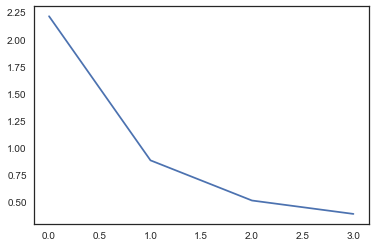

In [23]:
plt.plot(eig_val_cov)
plt.show()

The scree plot and the eigenvalues >1 rule agree that we should keep only the first component. 

## Summary

PCA is a series of linear transformations applied to a data frame to yield a smaller number of columns that explain a large proportion of the total variance contained in the data frame.

# Python Installations

## 1) Install Anaconda 
https://www.anaconda.com/download/

## 2) Install Jupyter Notebook 
https://jupyter.org/install

## 3) To launch Notebook 
### In your terminal, enter
### jupyter notebook 

## 4) Install Python Libraries
### Conda install pandas 
### Conda install numpy 